##Multi-Layer Perceptron
In this project, you will practice what we have been working with all first course. You will implement a multi-layer perceptron for a classification task. This model (MLP) will learn to classify  the content of an image (object in an image), our images are taken from the **MNIST dataset**. The MNIST database has images of handwritten digits, **has a training set of 60,000 examples, and a test set of 10,000 examples**. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

To build MPL neural network, you will use MLPClassifier in sklearn library.

## Steps


### 1) First, Imports
let’s import all the packages  will be needing:

In [ ]:
from scipy.stats import mode
import numpy as np
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from time import time
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix

import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')


### 2) Download the Dataset MNIST from keras datasets repos
and load the images into splits train and test

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

**Exercise**
Check:
- the size each train dataset and test dataset
- How much percent represent train and test dataset of original dataset ?
- size of image

In [ ]:
print(?)
print(?)

(60000, 28, 28)
(10000, 28, 28)


Now, Since The model is 1D layers, so the data images must be converted from 2D to 1D, so we need to use reshape function


**Exercise**  Convert 2D dataset to 1D

**Tips**

Number of images rests as it is for x_train, and x_test
the new 1D shape of 2D image is the reult of multiplication of width and height

so if we know the original dimensions by:
nsamples, nx, ny = X_train.shape

Use X_train.reshape(? ) to find the new dimensions

In [ ]:

nsamples, nx, ny = X_train.shape
X_train_ = X_train.reshape(nsamples,nx*ny)

nsamples, nx, ny = X_test.shape
X_test_ = X_test.reshape(nsamples,nx*ny)



In [ ]:
#verify the shape after reshaping to 1D

X_train_.?

(60000, 784)

**Exercise**
Using the *matplotlib.pyplot* plot some images from x_train, and display their corresponding label from y_train

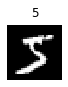

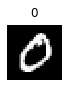

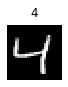

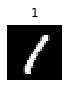

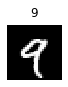

In [ ]:
import matplotlib.pyplot as plt
#plt.gray()
for i in range(5):
  fig,ax = plt.subplots(figsize=(1,1))
  ax.matshow(?)
  plt.title((?))
  #ax.axis('off')
plt.show()

## Training MLP

Using built-in [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) function, you will train your model. This function has few parameters to be tuned to affect the performance of training. Right now, we will set only parameter of ieteration, and leaving the rest to get the default values.

In [ ]:
mlp = MLPClassifier(verbose=True, max_iter=50)
st = time()
mlp.fit(X_train_, Y_train)
end = time() - st

print('elapsed time in seconds', end)


Iteration 1, loss = 3.36732556
Iteration 2, loss = 0.99501072
Iteration 3, loss = 0.54050259
Iteration 4, loss = 0.35540283
Iteration 5, loss = 0.26903674
Iteration 6, loss = 0.21923121
Iteration 7, loss = 0.17504945
Iteration 8, loss = 0.15409059
Iteration 9, loss = 0.14200852
Iteration 10, loss = 0.12449713
Iteration 11, loss = 0.12317130
Iteration 12, loss = 0.11277604
Iteration 13, loss = 0.11034165
Iteration 14, loss = 0.11096274
Iteration 15, loss = 0.10137307
Iteration 16, loss = 0.09837896
Iteration 17, loss = 0.09695427
Iteration 18, loss = 0.09314763
Iteration 19, loss = 0.08724854
Iteration 20, loss = 0.08093622
Iteration 21, loss = 0.08667539
Iteration 22, loss = 0.08009473
Iteration 23, loss = 0.07561246
Iteration 24, loss = 0.07042901
Iteration 25, loss = 0.08505771
Iteration 26, loss = 0.07595610
Iteration 27, loss = 0.06517076
Iteration 28, loss = 0.07026450
Iteration 29, loss = 0.06377755
Iteration 30, loss = 0.06902676
Iteration 31, loss = 0.05916814
Iteration 32, los

## Evaluation
Now, you need to evaluate the accuracy of your model and validate it on test data


Use the function *[accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)* from *sklearn.metrics*:
- to caluculate the accuracy on train dataset
- to caluculate the accuracy on test dataset

In [ ]:
from sklearn.metrics import accuracy_score

acc_tr = accuracy_score(?, mlp.predict(?)) # which data ?
acc_ts = accuracy_score(?, mlp.predict(?)) # which data

print("training accuracy:", acc_tr)
print("Test accuracy:",acc_ts)



training accuracy: 0.9856666666666667
Test accuracy: 0.9625


There are many other metrics to evaluate the performance of a model, please check [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn-metrics-classification-report)

**Exercise**

Could you read and learn more about those different meatrics, and what are the differences between them ?

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(?, mlp.predict(?))) # with wich data ?


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.95      0.96      1032
           3       0.95      0.97      0.96      1010
           4       0.99      0.92      0.96       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.91      0.98      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



## Plot the LEARNING CURVE

As seen during training, the error (loss) has been decreasing, all values of loss are saved in a structure of the model, called loss_curve_, you can access it as
mlp.loss_curve_

- Could you plot training loss values as a curve ?

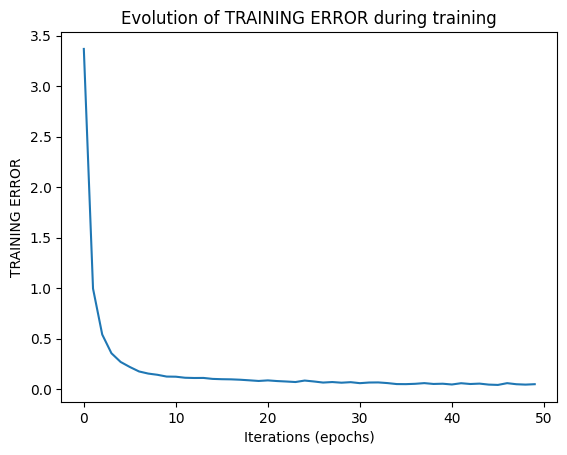

In [ ]:
import matplotlib.pyplot as plt
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(mlp.loss_curve_)
plt.show()


##Benchmark 1


To get the best performance of *[MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)*, benchmark the classifier with different combinations of parameters to fall on the best combination of parameter values corresponding the better performance

Start with two parameters:
1.   variation on alpha param: alpha is a learning rate, that you may consider it as a factor to improve learning, we will take it in details in the next course
2.   variation on the iterations number

**Tips**
consider the following values of each parameter

alphas = [0.0001,0.001, 0.1, 10]

max_iter = [10,100,200]



In [ ]:
i = 0
alphas = [0.0001,0.001, 0.1, 10]
max_iter = [15,50,100]
df = pd.DataFrame(columns = ['alpha','max_iter','acc_train','acc_test','train_estim'])
t = time()
for a in alphas:
    for mi in max_iter:
        st = time()
        mlp = MLPClassifier(?,?)
        mlp.fit(X_train_,Y_train)
        end = time() - st

        ### # Train Accuracy
        ### # Test Accuracy
        acc_tr = #your code
        acc_ts = #you code
        print(?) # print results as same as results shown below
        df.loc[i] = [a,mi,acc_tr,acc_ts,end]
        i=i+1
endf = time() - t
print('total elapsed time= ',endf)

alpha =  0.0001  max_iter= 15  acc_train= 0.9754333333333334  acc_test=  0.9543  train_estim=  21.671510219573975
alpha =  0.0001  max_iter= 50  acc_train= 0.9877  acc_test=  0.9632  train_estim=  84.37871193885803
alpha =  0.0001  max_iter= 100  acc_train= 0.99165  acc_test=  0.9659  train_estim=  83.65325236320496
alpha =  0.001  max_iter= 15  acc_train= 0.9769666666666666  acc_test=  0.9523  train_estim=  21.062217473983765
alpha =  0.001  max_iter= 50  acc_train= 0.9909166666666667  acc_test=  0.9641  train_estim=  73.05371761322021
alpha =  0.001  max_iter= 100  acc_train= 0.9925166666666667  acc_test=  0.9637  train_estim=  111.9639642238617
alpha =  0.1  max_iter= 15  acc_train= 0.9730833333333333  acc_test=  0.9495  train_estim=  19.60639762878418
alpha =  0.1  max_iter= 50  acc_train= 0.9868833333333333  acc_test=  0.9617  train_estim=  72.29016160964966
alpha =  0.1  max_iter= 100  acc_train= 0.9873833333333333  acc_test=  0.9629  train_estim=  105.49151587486267
alpha =  10 

In [ ]:
df # Results


,alpha,max_iter,acc_train,acc_test,train_estim
0,0.0001,15.0,0.975433,0.9543,21.671510
1,0.0001,50.0,0.987700,0.9632,84.378712
2,0.0001,100.0,0.991650,0.9659,83.653252
3,0.0010,15.0,0.976967,0.9523,21.062217
4,0.0010,50.0,0.990917,0.9641,73.053718
5,0.0010,100.0,0.992517,0.9637,111.963964
6,0.1000,15.0,0.973083,0.9495,19.606398
7,0.1000,50.0,0.986883,0.9617,72.290162
8,0.1000,100.0,0.987383,0.9629,105.491516
9,10.0000,15.0,0.974083,0.9617,20.979022


##Benchmark 2

After finiding the best max_iterations and best alpha,
1.   Use them to do a second benchmark to find the number of nodes in hidden layer which make the performance optimal
2.   You can plot a curve of accuracy which is function of number of nodes ==> *acc = f(Nodes_Num)*
3.   Please Comment your results.


In [ ]:

Nodes_Num = [10,20,50,100,400,1000]
acc_tr = []
acc_ts = []
timelog = []
for nn in Nodes_Num:
    t = time()
    mlp = MLPClassifier(alpha=0.0010, max_iter=100, hidden_layer_sizes=(nn,))
    print('nodes number = ',nn)
    mlp.fit(X_train_, Y_train)
    endt = time() - t

    a_tr = accuracy_score(Y_train, mlp.predict(X_train_)) # Train Accuracy
    a_ts = accuracy_score(Y_test, mlp.predict(X_test_)) # Test Accuracy

    acc_tr.append(a_tr)
    acc_ts.append(a_ts)
    timelog.append(endt)


nodes number =  10
nodes number =  20
nodes number =  50
nodes number =  100
nodes number =  400
nodes number =  1000


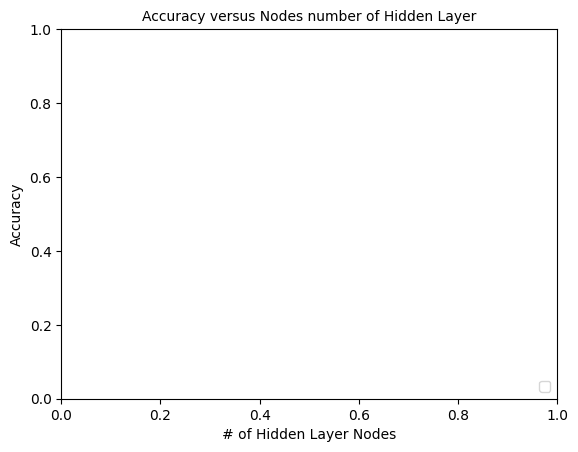

In [ ]:
#define your range of x axis
# stuff to plot curve of accuracy values
plt.xlabel("# of Hidden Layer Nodes")
plt.ylabel("Accuracy")
plt.legend(loc ='lower right')
plt.title('Accuracy versus Nodes number of Hidden Layer', fontsize=10)
plt.show()

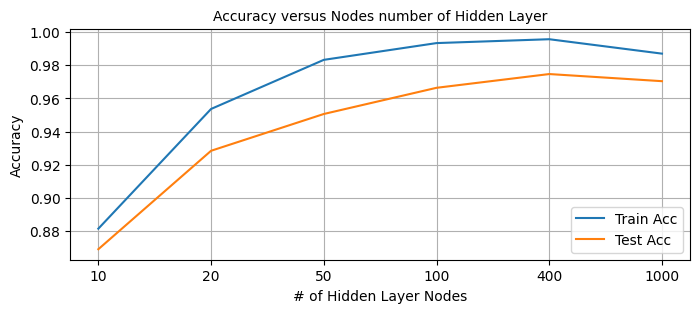

In [ ]:

#define your range of x axis
N = len(Nodes_Num)

l2 = np.arange(N)
# stuff to plot curve of accuracy values

plt.subplots(figsize=(8, 3))
plt.plot(?,?, label="Train Acc")
plt.plot(?,?, label="Test Acc")
plt.xticks(l2,Nodes_Num)
plt.grid(True)
plt.xlabel("# of Hidden Layer Nodes")
plt.ylabel("Accuracy")
plt.legend(loc ='lower right')
plt.title('Accuracy versus Nodes number of Hidden Layer', fontsize=10)
plt.show()